In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers
!gdown https://drive.google.com/uc?id=19Jn90oPwQ6yld2q9pETXZUhqYDbSdYXl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.0 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=19Jn90oPwQ6yld2q9pETXZUhqYDbSdYXl
To: /content/preprocessed.xlsx
100% 715k/715k [00:00<00:00, 134MB/s]


In [ ]:
cd drive/MyDrive/NLP_Insurance\ project/

[Errno 2] No such file or directory: 'drive/MyDrive/NLP_Insurance project/'
/content


In [ ]:
from transformers import AutoModel, AutoTokenizer
import pandas as pd
import matplotlib.pyplot as plt


model = AutoModel.from_pretrained("monologg/kobigbird-bert-base")
tokenizer = AutoTokenizer.from_pretrained("monologg/kobigbird-bert-base",
                                          additional_special_tokens=["[FACT]", "[ARGS]"]
                                          )
model.resize_token_embeddings(len(tokenizer))

df = pd.read_excel('pdf_data(전처리2).xlsx')

Some weights of the model checkpoint at monologg/kobigbird-bert-base were not used when initializing BigBirdModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BigBirdModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BigBirdModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


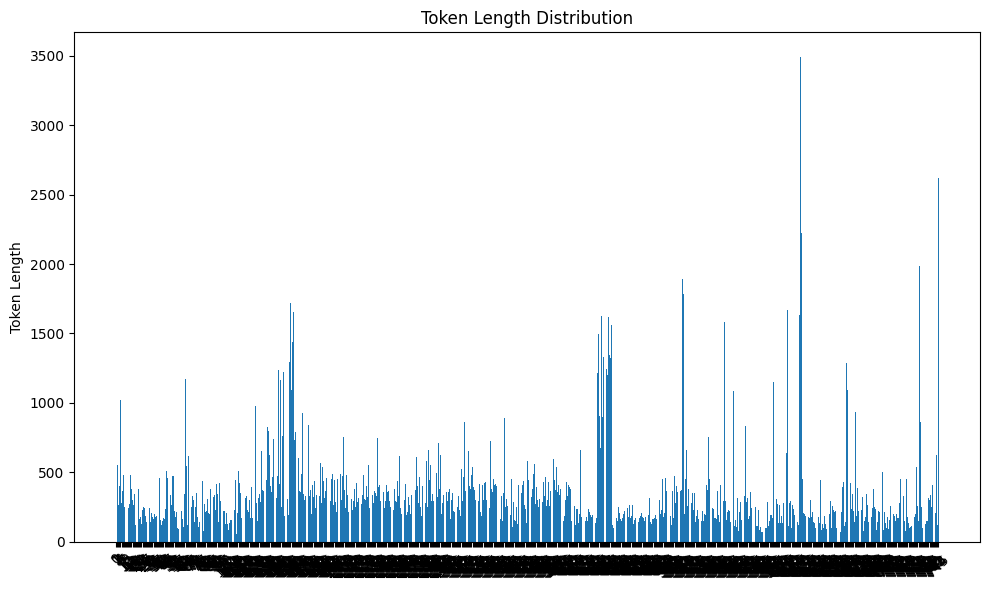

In [ ]:
# facts_pre 길이
token_lengths = [len(tokenizer.tokenize(text)) for text in df['facts_pre']]

plt.figure(figsize=(10, 6))
plt.bar(range(len(token_lengths)), token_lengths)
plt.xticks(range(len(token_lengths)), range(len(token_lengths)), rotation=45)
plt.ylabel('Token Length')
plt.title('Token Length Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# 토큰화된 길이가 4096을 초과하는 텍스트 개수 계산
count = sum([1 for text in df['facts_pre'] if len(tokenizer.tokenize(text)) > 2500])
count

2

In [ ]:
n = 0
for text in df['facts_pre']:
  if len(tokenizer.tokenize(text)) > 1024:
    print(n)
  n += 1

63
147
149
152
157
158
159
160
161
436
437
440
442
443
444
445
446
447
448
449
513
514
551
559
596
608
619
620
621
662
663
728
745


In [ ]:
# 토큰의 최대 길이와 평균 길이 계산
max_length = 0
total_length = 0
num_texts = 0

for text in df['facts_pre']:
    tokens = tokenizer.tokenize(text)
    max_length = max(max_length, len(tokens))
    total_length += len(tokens)
    num_texts += 1

average_length = total_length / num_texts

print("토큰의 최대 길이:", max_length)
print("토큰의 평균 길이:", average_length)

토큰의 최대 길이: 3495
토큰의 평균 길이: 350.2252010723861


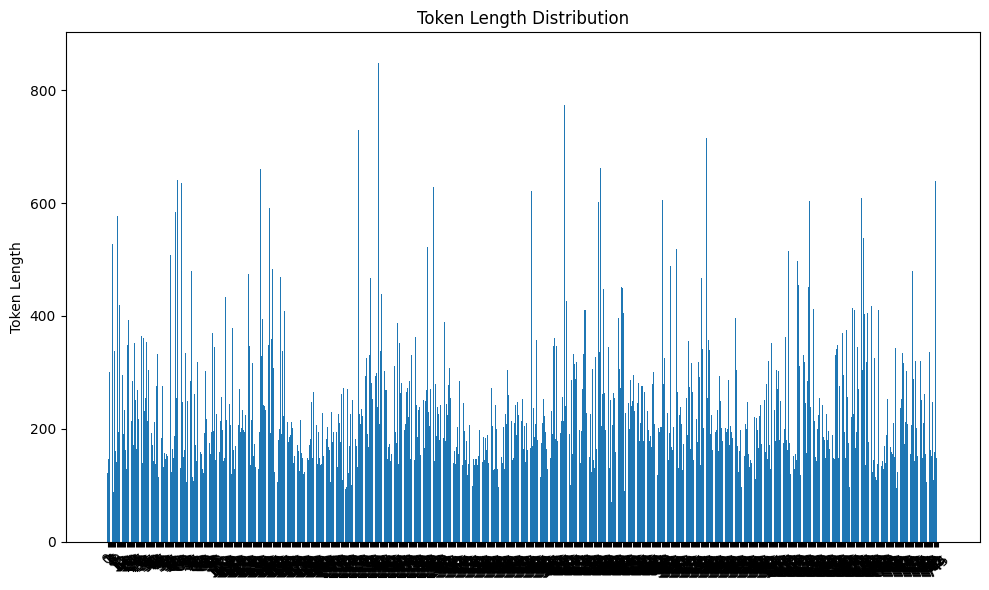

In [ ]:
# args_pre 길이
token_lengths = [len(tokenizer.tokenize(text)) for text in df['args_pre']]

plt.figure(figsize=(10, 6))
plt.bar(range(len(token_lengths)), token_lengths)
plt.xticks(range(len(token_lengths)), range(len(token_lengths)), rotation=45)
plt.ylabel('Token Length')
plt.title('Token Length Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# 토큰화된 길이가 4096을 초과하는 텍스트 개수 계산
count = sum([1 for text in df['args_pre'] if len(tokenizer.tokenize(text)) > 4096])
count

0

In [ ]:
# 토큰의 최대 길이와 평균 길이 계산
max_length = 0
total_length = 0
num_texts = 0

for text in df['args_pre']:
    tokens = tokenizer.tokenize(text)
    max_length = max(max_length, len(tokens))
    total_length += len(tokens)
    num_texts += 1

average_length = total_length / num_texts

print("토큰의 최대 길이:", max_length)
print("토큰의 평균 길이:", average_length)

토큰의 최대 길이: 860
토큰의 평균 길이: 236.843163538874


In [ ]:
df

,Facts,Args,label,facts_pre,args_pre
0,가. 보험계약의 체결 등 (1) 보험계약 체결 이 사건 보험계약자이자 신청인의 母...,가. 신청인의 주장 피보험자의 부주의로 인한 화재로 신청인 소유의 주택에 손해가 ...,0,가. 보험계약의 체결 등 (1) 보험계약 체결 이 사건 보험계약자이자 신청인의 모...,가. 신청인의 주장 피보험자의 부주의로 인한 화재로 신청인 소유의 주택에 손해가 ...
1,가. 보험계약의 체결 등(1) 보험계약 체결㈜0000개발은 2021. 1. 20. ...,가. 신청인의 주장사고가 덤프트럭을 후진하던 중 신호수(안전관리자)를 충격하여 발생...,0,가. 보험계약의 체결 등 (1) 보험계약 체결 0000개발은 2021. 1. 20....,가. 신청인의 주장 사고가 덤프트럭을 후진하던 중 신호수(안전관리자)를 충격하여 발...
2,가. 보험계약의 체결 등 신청인의 부친인 ○○○(이하 ‘피보험자’라 한다)은 본...,가. 신청인의 주장 이 사건 보험계약 청약서는 계약 전 알릴 의무 사항 중 하나...,0,가. 보험계약의 체결 등 신청인의 부친인 [피보험자](이하 피보험자라 한다)은 본...,가. 신청인의 주장 이 사건 보험계약 청약서는 계약 전 알릴 의무 사항 중 하나...
3,가. 보험계약의 체결 등 (1) 보험계약 체결000000공제조합은 2018. 4. ...,가. 신청인의 주장 신청인은 피해자의 신체장해에 대한 배상책임을 부담하였으므로 피신...,0,가. 보험계약의 체결 등 (1) 보험계약 체결 000000공제 조합은 2018. 4...,가. 신청인의 주장 신청인은 피해자의 신체 장해에 대한 배상 책임을 부담하였으므로 ...
4,가. 보험계약의 체결 등 (1) 보험계약 체결 신청인들은 아래와 같은 절차를 통해 ...,가. 신청인들의 주장 빈산소수괴 발생상황 속보는 이 사건 약관 제5조(보상하지 않...,0,가. 보험계약의 체결 등 (1) 보험계약 체결 신청인들은 아래와 같은 절차를 통해 ...,가. 신청인들의 주장 빈 산소 수괴 발생 상황 속보는 이 사건 약관 제5조(보상하...
...,...,...,...,...,...
741,A는 피신청인과 2012.1.21. 화재보험계약을 체결함. 2012.8.28. 태풍...,(1) 신청인의 주장 이 건 사고는 약관상 보상하는 손해에 해당하는데도 보험금 지급...,0,A는 피신청인과 2012.1.21. 화재보험계약을 체결함. 2012.8.28. 태풍...,(1) 신청인의 주장 이 건 사고는 약관상 보상하는 손해에 해당하는데도 보험금 지급...
742,㈜〇〇엔지니어링 대표이사 A는 2015.7.15. ㈜〇〇엔지니어링을 계약자 겸 피보...,"(1) 신청인의 주장 신청인은 금속주물틀을 완성․출하하는 업체이며, 평소 작업공정상...",0,엔지니어링 대표이사 A는 2015.7.15. 엔지니어링을 계약자 겸 피보험자로 하여...,"(1) 신청인의 주장 신청인은 금속 주물 틀은 완성 출하하는 업체이며, 평소 작업 ..."
743,"보험계약자(○○○ Shipping Co., Limited)는 TLO(전손부담조건) ...","(1) 신청인의 주장 보험목적물인 선박은 선령이 38년 되었다고 하나, 동 보험 부...",1,"보험계약자( Shipping C., Limited)는 TL(전 손 부담 조건) SC...","(1) 신청인의 주장 보험목적물인 선박은 선령이 38년 되었다고 하나, 동 보험 부..."
744,신청인은 2001.9.6. 북태평양 어장에서 ○○선박으로부터 화물을 전재한 후 부산...,590) 부산지방법원 선고 98가합18097 판결 참조. 888(1) 신청인의 주장...,1,신청인은 2001.9.6. 북태평양 어장에서 선박으로부터 화물을 전재한 후 부산항으...,590) 부산지방법원 선고 98가 합 18097 판결 참조. 888(1) 신청인의 ...
